# GC-01

## FTDS - 015
## Rio R

## Description

### Objective

1. Mencari 10 Negara dengan covid case tertinggi dan terendah
2. Mencari info terkait kasus covid di Indonesia
3. Mencari 10 Negara dengan death cases tertinggi
4. Mencari 10 Negara dengan recovered cases tertinggi dan terendah

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

# Query

### SELECT province_state, country_region, date, latitude, longitude,	location_geom, confirmed, deaths, recovered, active
### FROM `bigquery-public-data.covid19_jhu_csse_eu.summary`

In [2]:
# SELECT province_state, country_region, date, latitude, longitude,	location_geom, confirmed, deaths, recovered, active
# FROM `bigquery-public-data.covid19_jhu_csse_eu.summary`

# Query data yang di ambil cukup besar agar dapat melihat secara keseluruhan data covid yang ada. Namun tidak semua kolom di pakai.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data Set Covid

In [4]:
covid = pd.read_csv('h8dsft_P0GC1_RioR.csv')
covid

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
0,Jammu and Kashmir,India,2021-03-05,33.759430,76.612638,POINT(76.612638 33.75943),126853.0,1960.0,124002.0,891.0
1,Jharkhand,India,2021-03-05,23.654536,85.557631,POINT(85.557631 23.654536),120173.0,1091.0,118601.0,481.0
2,Karnataka,India,2021-03-05,14.705180,76.166436,POINT(76.166436 14.70518),953813.0,12354.0,935066.0,6393.0
3,Kerala,India,2021-03-05,10.450898,76.405749,POINT(76.405749 10.450898),1072436.0,4271.0,1024309.0,43856.0
4,Ladakh,India,2021-03-05,34.152600,77.577100,POINT(77.5771 34.1526),9826.0,130.0,9654.0,42.0
...,...,...,...,...,...,...,...,...,...,...
3420849,Missouri,US,2021-09-10,36.649163,-92.444591,POINT(-92.44459066 36.64916339),1015.0,26.0,NaN,NaN
3420850,Missouri,US,2021-09-10,36.213057,-89.787423,POINT(-89.78742322 36.2130572),1893.0,39.0,NaN,NaN
3420851,Missouri,US,2021-09-10,37.706608,-89.827411,POINT(-89.82741088 37.70660776),2735.0,32.0,NaN,NaN
3420852,Missouri,US,2021-09-10,38.727989,-93.284717,POINT(-93.28471706 38.72798918),6745.0,92.0,NaN,NaN


In [5]:
# Show head and tail

covid.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
0,Jammu and Kashmir,India,2021-03-05,33.759430,76.612638,POINT(76.612638 33.75943),126853.0,1960.0,124002.0,891.0
1,Jharkhand,India,2021-03-05,23.654536,85.557631,POINT(85.557631 23.654536),120173.0,1091.0,118601.0,481.0
2,Karnataka,India,2021-03-05,14.705180,76.166436,POINT(76.166436 14.70518),953813.0,12354.0,935066.0,6393.0
3,Kerala,India,2021-03-05,10.450898,76.405749,POINT(76.405749 10.450898),1072436.0,4271.0,1024309.0,43856.0
4,Ladakh,India,2021-03-05,34.152600,77.577100,POINT(77.5771 34.1526),9826.0,130.0,9654.0,42.0


In [6]:
covid.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
3420849,Missouri,US,2021-09-10,36.649163,-92.444591,POINT(-92.44459066 36.64916339),1015.0,26.0,NaN,NaN
3420850,Missouri,US,2021-09-10,36.213057,-89.787423,POINT(-89.78742322 36.2130572),1893.0,39.0,NaN,NaN
3420851,Missouri,US,2021-09-10,37.706608,-89.827411,POINT(-89.82741088 37.70660776),2735.0,32.0,NaN,NaN
3420852,Missouri,US,2021-09-10,38.727989,-93.284717,POINT(-93.28471706 38.72798918),6745.0,92.0,NaN,NaN
3420853,Missouri,US,2021-09-10,37.877361,-91.793517,POINT(-91.79351727 37.87736118),5709.0,170.0,NaN,NaN


#### Data Cleaning

In [7]:
covid.shape

(3420854, 10)

In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420854 entries, 0 to 3420853
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   country_region  object 
 2   date            object 
 3   latitude        float64
 4   longitude       float64
 5   location_geom   object 
 6   confirmed       float64
 7   deaths          float64
 8   recovered       float64
 9   active          float64
dtypes: float64(6), object(4)
memory usage: 261.0+ MB


### Summarizing and Handling missing value

In [9]:
covid.isnull().values.any()

True

In [10]:
covid.isnull().sum()

province_state     154365
country_region          1
date                    0
latitude            76153
longitude           76153
location_geom       76153
confirmed              19
deaths                442
recovered         1985264
active            1993343
dtype: int64

In [11]:
covid.isnull().sum().sum()

4361893

- Jumlah missing value cukup banyak sehingga perlu di handle.
- Handle missing value dengan fillna, Namun penggantian value pada missing value di sesuaikan dengan type data dan keterangan pada column tersebut.

In [12]:
covid.fillna({'province_state':'Unknown','country_region':'Unknown','latitude':'-','longitude':'-','confirmed':0,'deaths':0,'recovered':0,'active':0},inplace=True)
covid

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
0,Jammu and Kashmir,India,2021-03-05,33.75943,76.612638,POINT(76.612638 33.75943),126853.0,1960.0,124002.0,891.0
1,Jharkhand,India,2021-03-05,23.654536,85.557631,POINT(85.557631 23.654536),120173.0,1091.0,118601.0,481.0
2,Karnataka,India,2021-03-05,14.70518,76.166436,POINT(76.166436 14.70518),953813.0,12354.0,935066.0,6393.0
3,Kerala,India,2021-03-05,10.450898,76.405749,POINT(76.405749 10.450898),1072436.0,4271.0,1024309.0,43856.0
4,Ladakh,India,2021-03-05,34.1526,77.5771,POINT(77.5771 34.1526),9826.0,130.0,9654.0,42.0
...,...,...,...,...,...,...,...,...,...,...
3420849,Missouri,US,2021-09-10,36.649163,-92.444591,POINT(-92.44459066 36.64916339),1015.0,26.0,0.0,0.0
3420850,Missouri,US,2021-09-10,36.213057,-89.787423,POINT(-89.78742322 36.2130572),1893.0,39.0,0.0,0.0
3420851,Missouri,US,2021-09-10,37.706608,-89.827411,POINT(-89.82741088 37.70660776),2735.0,32.0,0.0,0.0
3420852,Missouri,US,2021-09-10,38.727989,-93.284717,POINT(-93.28471706 38.72798918),6745.0,92.0,0.0,0.0


In [13]:
# Column location_geom dihapus karena data yang sama sudah tercatat pada column latitude dan longitude.
covid.drop(labels=['location_geom'],axis=1,inplace=True)

In [14]:
covid

,province_state,country_region,date,latitude,longitude,confirmed,deaths,recovered,active
0,Jammu and Kashmir,India,2021-03-05,33.75943,76.612638,126853.0,1960.0,124002.0,891.0
1,Jharkhand,India,2021-03-05,23.654536,85.557631,120173.0,1091.0,118601.0,481.0
2,Karnataka,India,2021-03-05,14.70518,76.166436,953813.0,12354.0,935066.0,6393.0
3,Kerala,India,2021-03-05,10.450898,76.405749,1072436.0,4271.0,1024309.0,43856.0
4,Ladakh,India,2021-03-05,34.1526,77.5771,9826.0,130.0,9654.0,42.0
...,...,...,...,...,...,...,...,...,...
3420849,Missouri,US,2021-09-10,36.649163,-92.444591,1015.0,26.0,0.0,0.0
3420850,Missouri,US,2021-09-10,36.213057,-89.787423,1893.0,39.0,0.0,0.0
3420851,Missouri,US,2021-09-10,37.706608,-89.827411,2735.0,32.0,0.0,0.0
3420852,Missouri,US,2021-09-10,38.727989,-93.284717,6745.0,92.0,0.0,0.0


In [15]:
covid.isnull().sum()

province_state    0
country_region    0
date              0
latitude          0
longitude         0
confirmed         0
deaths            0
recovered         0
active            0
dtype: int64

In [16]:
covid.isnull().sum().sum()

0

#### Missing Value sudah tidak ada.

# Manipulating Dataframe

In [17]:
#Rubah Dtype date
covid['date'] = covid['date'].astype('datetime64')
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420854 entries, 0 to 3420853
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   province_state  object        
 1   country_region  object        
 2   date            datetime64[ns]
 3   latitude        object        
 4   longitude       object        
 5   confirmed       float64       
 6   deaths          float64       
 7   recovered       float64       
 8   active          float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 234.9+ MB


In [18]:
# Rename column
covid.rename(columns={'province_state':'province','country_region':'country','latitude':'lat','longitude':'long'},inplace=True)
covid


,province,country,date,lat,long,confirmed,deaths,recovered,active
0,Jammu and Kashmir,India,2021-03-05,33.75943,76.612638,126853.0,1960.0,124002.0,891.0
1,Jharkhand,India,2021-03-05,23.654536,85.557631,120173.0,1091.0,118601.0,481.0
2,Karnataka,India,2021-03-05,14.70518,76.166436,953813.0,12354.0,935066.0,6393.0
3,Kerala,India,2021-03-05,10.450898,76.405749,1072436.0,4271.0,1024309.0,43856.0
4,Ladakh,India,2021-03-05,34.1526,77.5771,9826.0,130.0,9654.0,42.0
...,...,...,...,...,...,...,...,...,...
3420849,Missouri,US,2021-09-10,36.649163,-92.444591,1015.0,26.0,0.0,0.0
3420850,Missouri,US,2021-09-10,36.213057,-89.787423,1893.0,39.0,0.0,0.0
3420851,Missouri,US,2021-09-10,37.706608,-89.827411,2735.0,32.0,0.0,0.0
3420852,Missouri,US,2021-09-10,38.727989,-93.284717,6745.0,92.0,0.0,0.0


In [19]:
#Add Column death_rate
covid['death_rate']=covid['deaths'] / covid['confirmed']
covid

,province,country,date,lat,long,confirmed,deaths,recovered,active,death_rate
0,Jammu and Kashmir,India,2021-03-05,33.75943,76.612638,126853.0,1960.0,124002.0,891.0,0.015451
1,Jharkhand,India,2021-03-05,23.654536,85.557631,120173.0,1091.0,118601.0,481.0,0.009079
2,Karnataka,India,2021-03-05,14.70518,76.166436,953813.0,12354.0,935066.0,6393.0,0.012952
3,Kerala,India,2021-03-05,10.450898,76.405749,1072436.0,4271.0,1024309.0,43856.0,0.003983
4,Ladakh,India,2021-03-05,34.1526,77.5771,9826.0,130.0,9654.0,42.0,0.013230
...,...,...,...,...,...,...,...,...,...,...
3420849,Missouri,US,2021-09-10,36.649163,-92.444591,1015.0,26.0,0.0,0.0,0.025616
3420850,Missouri,US,2021-09-10,36.213057,-89.787423,1893.0,39.0,0.0,0.0,0.020602
3420851,Missouri,US,2021-09-10,37.706608,-89.827411,2735.0,32.0,0.0,0.0,0.011700
3420852,Missouri,US,2021-09-10,38.727989,-93.284717,6745.0,92.0,0.0,0.0,0.013640


### Data Exploration

In [20]:
covid['country'].value_counts


<bound method IndexOpsMixin.value_counts of 0          India
1          India
2          India
3          India
4          India
           ...  
3420849       US
3420850       US
3420851       US
3420852       US
3420853       US
Name: country, Length: 3420854, dtype: object>

In [21]:
covid1=covid
covid1

,province,country,date,lat,long,confirmed,deaths,recovered,active,death_rate
0,Jammu and Kashmir,India,2021-03-05,33.75943,76.612638,126853.0,1960.0,124002.0,891.0,0.015451
1,Jharkhand,India,2021-03-05,23.654536,85.557631,120173.0,1091.0,118601.0,481.0,0.009079
2,Karnataka,India,2021-03-05,14.70518,76.166436,953813.0,12354.0,935066.0,6393.0,0.012952
3,Kerala,India,2021-03-05,10.450898,76.405749,1072436.0,4271.0,1024309.0,43856.0,0.003983
4,Ladakh,India,2021-03-05,34.1526,77.5771,9826.0,130.0,9654.0,42.0,0.013230
...,...,...,...,...,...,...,...,...,...,...
3420849,Missouri,US,2021-09-10,36.649163,-92.444591,1015.0,26.0,0.0,0.0,0.025616
3420850,Missouri,US,2021-09-10,36.213057,-89.787423,1893.0,39.0,0.0,0.0,0.020602
3420851,Missouri,US,2021-09-10,37.706608,-89.827411,2735.0,32.0,0.0,0.0,0.011700
3420852,Missouri,US,2021-09-10,38.727989,-93.284717,6745.0,92.0,0.0,0.0,0.013640


In [22]:
covid1 = covid.sort_values(by=['date'],ascending=False).reset_index(drop=True)
covid1

,province,country,date,lat,long,confirmed,deaths,recovered,active,death_rate
0,Indiana,US,2022-08-11,39.478991,-86.445734,17929.0,291.0,0.0,0.0,0.016231
1,Michigan,US,2022-08-11,44.684686,-83.595079,1809.0,72.0,0.0,0.0,0.039801
2,Louisiana,US,2022-08-11,31.108848,-93.181538,10831.0,192.0,0.0,0.0,0.017727
3,Louisiana,US,2022-08-11,30.852885,-90.038667,14632.0,260.0,0.0,0.0,0.017769
4,Louisiana,US,2022-08-11,32.708477,-93.331218,12876.0,189.0,0.0,0.0,0.014678
...,...,...,...,...,...,...,...,...,...,...
3420849,Shanghai,Mainland China,2020-01-22,-,-,9.0,0.0,0.0,0.0,0.000000
3420850,Shandong,Mainland China,2020-01-22,-,-,2.0,0.0,0.0,0.0,0.000000
3420851,Shaanxi,Mainland China,2020-01-22,-,-,0.0,0.0,0.0,0.0,NaN
3420852,Qinghai,Mainland China,2020-01-22,-,-,0.0,0.0,0.0,0.0,NaN


- Terdapat 251 Negara yang tercatat mempunyai kasus COVID.
- Rentang waktu data yang terambil yaitu dari tgl 22 January 2020 s.d 11 Agustus 2022.

In [78]:
covid['confirmed'].mean()

53212.0445423862

In [79]:
covid['deaths'].mean()

871.0580755565716

In [80]:
covid['active'].mean()

2736.0187824443838

## Query

In [86]:
covid[(covid['country']=='US') &
      (covid['deaths']>871) &
      (covid['confirmed']>53212) &
      (covid['active']>2736)
]

,province,country,date,lat,long,confirmed,deaths,recovered,active,death_rate
426,Alabama,US,2021-03-05,33.555547,-86.895063,71912.0,1402.0,0.0,70510.0,0.019496
495,Arizona,US,2021-03-05,33.348359,-112.491815,514132.0,9286.0,0.0,504846.0,0.018062
499,Arizona,US,2021-03-05,32.097133,-111.789003,110287.0,2254.0,0.0,108033.0,0.020438
581,California,US,2021-03-05,37.646294,-121.892927,81168.0,1285.0,0.0,79883.0,0.015831
590,California,US,2021-03-05,36.757339,-119.646695,96023.0,1466.0,0.0,94557.0,0.015267
...,...,...,...,...,...,...,...,...,...,...
3398253,Texas,US,2020-09-26,32.766706,-96.777961,80605.0,1120.0,0.0,79485.0,0.013895
3398297,Texas,US,2020-09-26,29.858649,-95.393395,140868.0,2572.0,0.0,138296.0,0.018258
3399470,Illinois,US,2020-06-20,41.841448,-87.816588,86885.0,4390.0,0.0,82495.0,0.050527
3400507,California,US,2020-06-20,34.308284,-118.228241,81709.0,3112.0,0.0,78597.0,0.038086


In [87]:
covid[
      (covid['deaths']>871) &
      (covid['confirmed']>53212) &
      (covid['active']>2736)
]

,province,country,date,lat,long,confirmed,deaths,recovered,active,death_rate
2,Karnataka,India,2021-03-05,14.70518,76.166436,953813.0,12354.0,935066.0,6393.0,0.012952
3,Kerala,India,2021-03-05,10.450898,76.405749,1072436.0,4271.0,1024309.0,43856.0,0.003983
6,Madhya Pradesh,India,2021-03-05,23.541513,78.289633,263747.0,3866.0,256424.0,3457.0,0.014658
7,Maharashtra,India,2021-03-05,19.449759,76.108221,2198399.0,52393.0,2055951.0,90055.0,0.023832
14,Punjab,India,2021-03-05,30.841465,75.40879,186189.0,5898.0,173630.0,6661.0,0.031677
...,...,...,...,...,...,...,...,...,...,...
3414583,Unknown,Uzbekistan,2021-08-02,41.377491,64.585262,131079.0,886.0,124728.0,5465.0,0.006759
3414585,Unknown,Venezuela,2021-08-02,6.4238,-66.5897,307570.0,3623.0,292567.0,11380.0,0.011779
3414586,Unknown,Vietnam,2021-08-02,14.058324,108.277199,157507.0,1306.0,43157.0,116493.0,0.008292
3414589,Unknown,Zambia,2021-08-02,-13.133897,27.849332,196490.0,3412.0,188950.0,4128.0,0.017365


- Negara yang mempunyai covid case di atas rata-rata masih sangat banyak.

In [88]:
# Mencari covid deaths cases di US

covid[(covid['country']=='US')].groupby(by=['province','country'])[['deaths']].sum().sort_values(by='deaths',ascending=False).head(10)


,,deaths
province,country,
California,US,45201929.0
New York,US,42555003.0
Texas,US,42071163.0
Florida,US,34041361.0
Pennsylvania,US,21763099.0
New Jersey,US,20587864.0
Illinois,US,19483819.0
Georgia,US,17620230.0
Michigan,US,17150123.0


In [89]:
# Mencari confirmed covid cases di US
covid[(covid['country']=='US')].groupby(by=['province','country'])[['confirmed']].sum().sort_values(by='confirmed',ascending=False).head(10)

,,confirmed
province,country,
California,US,3.710682e+09
Texas,US,2.855034e+09
Florida,US,2.451843e+09
New York,US,2.051644e+09
Illinois,US,1.309063e+09
Pennsylvania,US,1.130886e+09
Ohio,US,1.087791e+09
Georgia,US,1.078746e+09
North Carolina,US,1.037957e+09


In [90]:
# Mencari covid case yang ada di Indonesia
covid[(covid['country']=='Indonesia')].sort_values(by='confirmed',ascending=False).head(10)

,province,country,date,lat,long,confirmed,deaths,recovered,active,death_rate
2794409,Unknown,Indonesia,2022-08-11,-0.7893,113.9213,6267137.0,157171.0,0.0,0.0,0.025079
2706234,Unknown,Indonesia,2022-08-10,-0.7893,113.9213,6261605.0,157149.0,0.0,0.0,0.025097
772581,Unknown,Indonesia,2022-08-09,-0.7893,113.9213,6255679.0,157131.0,0.0,0.0,0.025118
1363807,Unknown,Indonesia,2022-08-08,-0.7893,113.9213,6249403.0,157113.0,0.0,0.0,0.025140
1302798,Unknown,Indonesia,2022-08-07,-0.7893,113.9213,6244978.0,157095.0,0.0,0.0,0.025155
58878,Unknown,Indonesia,2022-08-06,-0.7893,113.9213,6240699.0,157082.0,0.0,0.0,0.025171
3299780,Unknown,Indonesia,2022-08-05,-0.7893,113.9213,6235244.0,157072.0,0.0,0.0,0.025191
226875,Unknown,Indonesia,2022-08-04,-0.7893,113.9213,6229315.0,157060.0,0.0,0.0,0.025213
142077,Unknown,Indonesia,2022-08-03,-0.7893,113.9213,6222788.0,157046.0,0.0,0.0,0.025237
2208963,Unknown,Indonesia,2022-08-02,-0.7893,113.9213,6216621.0,157028.0,0.0,0.0,0.025259


In [91]:
#Mencari death case dan confirmed case covid di atas 100,000 di Indonesia
covid[(covid['deaths']>100000)&
     (covid['country']=='Indonesia') &
     (covid['confirmed']>100000)
].sort_values(by='death_rate',ascending=False).head(10)

,province,country,date,lat,long,confirmed,deaths,recovered,active,death_rate
299632,Unknown,Indonesia,2021-12-30,-0.7893,113.9213,4262540.0,144088.0,0.0,0.0,0.033803
1203974,Unknown,Indonesia,2021-12-31,-0.7893,113.9213,4262720.0,144094.0,0.0,0.0,0.033803
2534091,Unknown,Indonesia,2021-12-29,-0.7893,113.9213,4262351.0,144081.0,0.0,0.0,0.033803
2655401,Unknown,Indonesia,2021-12-23,-0.7893,113.9213,4261208.0,144042.0,0.0,0.0,0.033803
1576687,Unknown,Indonesia,2021-12-27,-0.7893,113.9213,4261879.0,144063.0,0.0,0.0,0.033803
1924213,Unknown,Indonesia,2021-12-24,-0.7893,113.9213,4261412.0,144047.0,0.0,0.0,0.033803
2314792,Unknown,Indonesia,2021-12-28,-0.7893,113.9213,4262157.0,144071.0,0.0,0.0,0.033802
1387715,Unknown,Indonesia,2021-12-22,-0.7893,113.9213,4261072.0,144034.0,0.0,0.0,0.033802
2932261,Unknown,Indonesia,2021-12-25,-0.7893,113.9213,4261667.0,144053.0,0.0,0.0,0.033802
1707279,Unknown,Indonesia,2021-12-26,-0.7893,113.9213,4261667.0,144053.0,0.0,0.0,0.033802


### GroupBY

In [92]:
# Mencari total confirmed case untuk setiap negara
# Mencari 10 negara dengan kasus covid tertinggi dan terendah

covid.groupby(by='country')[['confirmed']].sum().sort_values(by='confirmed',ascending=False)


,confirmed
country,
US,3.297415e+10
India,1.975965e+10
Brazil,1.371491e+10
France,8.200911e+09
United Kingdom,7.045478e+09
...,...
Cape Verde,1.000000e+00
Republic of the Congo,1.000000e+00
The Gambia,1.000000e+00


In [93]:
covid.groupby(by='country')[['confirmed']].sum().sort_values(by='confirmed',ascending=False).head(10)

,confirmed
country,
US,3.297415e+10
India,1.975965e+10
Brazil,1.371491e+10
France,8.200911e+09
United Kingdom,7.045478e+09
Germany,6.245564e+09
Russia,6.174635e+09
Turkey,5.287310e+09
Italy,5.055277e+09


In [94]:
covid.groupby(by='country')[['confirmed']].sum().sort_values(by='confirmed',ascending=False).tail(10)

,confirmed
country,
Saint Martin,2.0
East Timor,1.0
Ivory Coast,1.0
Channel Islands,1.0
North Ireland,1.0
Cape Verde,1.0
Republic of the Congo,1.0
The Gambia,1.0
Azerbaijan,1.0


### Notes
- 10 Negara dengan kasus covid tertinggi adalah US,India,Brazil,France,UK,Germany,Russia,Turkey,Italy,dan Spain.
- Jumlah Confirmed case di US hampir 2x lipat dari India dan Brazil.

- 10 Negara dengan kasus covid terendah adalah St.Martin, East Timor, Ivory Coast, Channel Islands, North Ireland, Cape Verde, Republic of Congo, Gambia, and Azerbaijan.
- Perlu dilakukan analisa lebih dalam, apakah memang tidak ada covid yang masuk ke dalam negara tersebut ATAU kasus covid yang masuk pada data tidak sesuai dengan kondisi di negara tersebut.

In [95]:
# Mencari total death case setiap negara
# Mencari 10 negara dengan angka kematian tertinggi

covid.groupby(by='country')[['deaths']].sum().sort_values(by='deaths',ascending=False)


,deaths
country,
US,486910782.0
Brazil,343004460.0
India,253652552.0
Mexico,171608319.0
Russia,140552626.0
...,...
Mayotte,0.0
Macau,0.0
Macao SAR,0.0


In [96]:
covid.groupby(by='country')[['deaths']].sum().sort_values(by='deaths',ascending=False).head(10)

,deaths
country,
US,486910782.0
Brazil,343004460.0
India,253652552.0
Mexico,171608319.0
Russia,140552626.0
Peru,102564945.0
United Kingdom,96678022.0
Italy,89845659.0
France,79774020.0


- 10 Negara dengan kasus kematian akibat covid tertinggi adalah US, Brazil, India, Mexico,Russia, Peru, UK, Italy,France dan Colombia
- Pada Negara US, Brazil, dan India yang merupakan 3 negara dengan kasus covid tertinggi juga merupakan 3 negara dengan angka kematian terbesar.

- Namun untuk Mexico, Peru, dan Colombia yang TIDAK TERMASUK pada 10 Negara dengan kasus covid terbanyak mempunyai kasus kematian yang cukup tinggi.


In [97]:
covid_indo = covid.groupby(by='country')

In [98]:
covid_indo.get_group('Indonesia').sort_values(by='deaths',ascending=False).head(10)

,province,country,date,lat,long,confirmed,deaths,recovered,active,death_rate
2794409,Unknown,Indonesia,2022-08-11,-0.7893,113.9213,6267137.0,157171.0,0.0,0.0,0.025079
2706234,Unknown,Indonesia,2022-08-10,-0.7893,113.9213,6261605.0,157149.0,0.0,0.0,0.025097
772581,Unknown,Indonesia,2022-08-09,-0.7893,113.9213,6255679.0,157131.0,0.0,0.0,0.025118
1363807,Unknown,Indonesia,2022-08-08,-0.7893,113.9213,6249403.0,157113.0,0.0,0.0,0.025140
1302798,Unknown,Indonesia,2022-08-07,-0.7893,113.9213,6244978.0,157095.0,0.0,0.0,0.025155
58878,Unknown,Indonesia,2022-08-06,-0.7893,113.9213,6240699.0,157082.0,0.0,0.0,0.025171
3299780,Unknown,Indonesia,2022-08-05,-0.7893,113.9213,6235244.0,157072.0,0.0,0.0,0.025191
226875,Unknown,Indonesia,2022-08-04,-0.7893,113.9213,6229315.0,157060.0,0.0,0.0,0.025213
142077,Unknown,Indonesia,2022-08-03,-0.7893,113.9213,6222788.0,157046.0,0.0,0.0,0.025237
2208963,Unknown,Indonesia,2022-08-02,-0.7893,113.9213,6216621.0,157028.0,0.0,0.0,0.025259


### Data Visualization

In [99]:
covid_usa = covid[(covid['country']=='US')].groupby(by=['province'])[['deaths']].sum().sort_values(by='deaths',ascending=False)

In [100]:
covid_usa1=covid_usa[(covid_usa['deaths']>10000000)].reset_index()
covid_usa1

,province,deaths
0,California,45201929.0
1,New York,42555003.0
2,Texas,42071163.0
3,Florida,34041361.0
4,Pennsylvania,21763099.0
5,New Jersey,20587864.0
6,Illinois,19483819.0
7,Georgia,17620230.0
8,Michigan,17150123.0
9,Ohio,16644215.0


<AxesSubplot:title={'center':'USA'}, xlabel='province'>

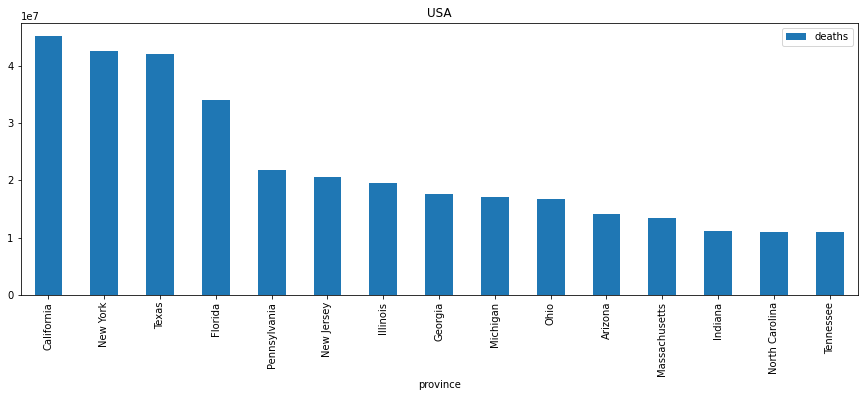

In [101]:

covid_usa1.plot(x='province',
                y='deaths',
                title='USA',
                figsize=(15,5),
                kind='bar')

##### Bar Chart di atas menunjukan province di US yang mempunyai death case di atas 10,000,000.- selama terjadinya COVID.

In [102]:
covid_country = covid.groupby(by='country')[['deaths']].sum().sort_values(by='deaths',ascending=False)
covid_country

,deaths
country,
US,486910782.0
Brazil,343004460.0
India,253652552.0
Mexico,171608319.0
Russia,140552626.0
...,...
Mayotte,0.0
Macau,0.0
Macao SAR,0.0


In [103]:
covid_country1=covid_country[(covid_country['deaths']>10000000)].sort_values(by='deaths',ascending=False).head(10)
covid_country1

,deaths
country,
US,486910782.0
Brazil,343004460.0
India,253652552.0
Mexico,171608319.0
Russia,140552626.0
Peru,102564945.0
United Kingdom,96678022.0
Italy,89845659.0
France,79774020.0


<AxesSubplot:xlabel='country'>

<Figure size 720x720 with 0 Axes>

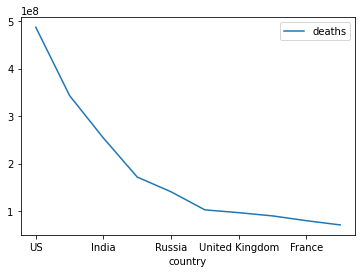

In [104]:
covid_country1.plot(label='deaths case', 
                    legend=True,
                    fig=plt.figure(figsize=(10,10))
                    )

<AxesSubplot:ylabel='deaths'>

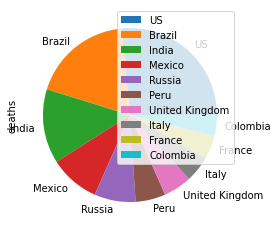

In [105]:
covid_country1.plot.pie(y='deaths')

#### Kesimpulan 

- Negara dengan covid case tertinggi adalah US, hal ini juga berpengaruh pada tingginya angka confirmed dan death case di US.
- jika di tinjau lebih detail, Negara bagian California, New York, Texas, dan Florida mempunyai angka covid tertinggi di US.
- Negara Peru, Mexico, dan Colombia merupakan 3 negara dengan kasus death_rate tertinggi dimana mayotitas covid berakhir dengan kematian.
- Selain di US, Negara Brazil dan India juga mempunyai kasus covid yang sangat tinggi.

- Seluruh data di ambil dalam rentang waktu tgl 22 January 2020 s.d 11 Agustus 2022.
